<a href="https://colab.research.google.com/github/Rickychris/Data-Science/blob/main/Automobile_example_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

## Automobile Dataset

### Problem Statement :

This dataset consist of data From 1985 Ward's Automotive Yearbook. It consists of three types of entities:
- The specification of an auto in terms of various characteristics
- Its assigned insurance risk rating 
- Its normalized losses in use as compared to other cars.



### About the DataSet :

Below are the features in the dataset and their description

|Features|Description|
|-----|-----|
|symboling|It is a risk factor symbol associated to the price & corresponds to the degree to which an automobile is more risky than its price indicates. +3 indicates risky, -3 indicates safety|
|make|Indicates the maker or manufacturer of the automobile|
|fuel-type|Indicates the type of fuel - diesel or gas|
|body-style|Indicates whether the body shape of automobile is a hardtop, wagon, sedan, hatchback or convertible|
|drive-wheels|Indicates the configuration of drive wheels for the automobile|
|wheel-base|It is the distance between the centers of the front wheel and the rear wheel. It is continuous ranging from 86.6 120.9|
|length|Indicates length of the automobile and ranges from 141.1 to 208.1.|
|width|Indicates width of the automobile and ranges from 60.3 to 72.3|
|height|Indicates the width of the automobile and ranges 47.8 to 59.8|
|horsepower|Maximum horsepower the automobile engine can output and ranges from 48 to 288|
|peak-rpm|RPM is a way to measure how many times per minute components in the engine rotate. It ranges from 4150 to 6600|
|highway-mpg|Indicates the miles per galon typically consumed at highways. It is continuous from 4150 to 6600|
|city-mpg|Indicates the miles per galon typically consumed at cities. It is continuous from 13 to 49|
|price|Indicates the price of the automobile and ranges from 5118 to 45400|
|normalized-losses|It is a continuous variable ranging from 65 to 256|
|engine-location|Indicates the location of the engine - front or rear|
|engine-type|Indicates the type of engine.|
|engine-size|It is continuous from 61 to 326|

### Load and understand your data
- The data consists of 205 instances and 14 features

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
# from sklearn.preprocessing import Imputer,LabelEncoder
from scipy.stats import norm, skew
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('Automobile_data.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


### Check the number of null values in each column get a general description of your data

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


,symboling,width,height,engine-size,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,65.907805,53.724878,126.907317,25.219512,30.751220,13227.478049
std,1.245307,2.145204,2.443522,41.642693,6.542142,6.886443,7902.651615
min,-2.000000,60.300000,47.800000,61.000000,13.000000,16.000000,5118.000000
25%,0.000000,64.100000,52.000000,97.000000,19.000000,25.000000,7788.000000
50%,1.000000,65.500000,54.100000,120.000000,24.000000,30.000000,10345.000000
75%,2.000000,66.900000,55.500000,141.000000,30.000000,34.000000,16500.000000
max,3.000000,72.300000,59.800000,326.000000,49.000000,54.000000,45400.000000


- There are no null values in each column.
- The `.describe()` function outputs 8 numbers for each column in the dataset. 
    - The first value 'count' shows how many rows have non-missing values
    - The second value is the mean, which is the average. 
    - std is the standard deviation, which measures how numerically spread out the values are.
    - For all the below values the data should be arranged in ascending order first.
        - min and max represent the minimum and maximum values in that column
        - The value 50% represents the median in every column.
        - 25% represents the value which lies above the 25% of the values in the data.
        - 75% represents the value which lies above the 75% of the values in the data.

### Plot a histogram showing the distribution of the car prices (target variable) and if any skewness, print the value of skewness

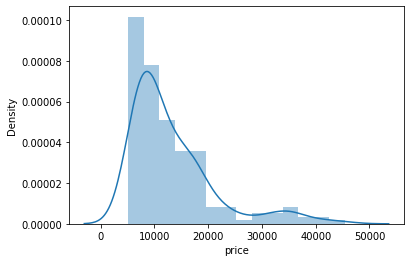

In [ ]:
sns.distplot(df['price'],kde=True)

- Try guessing the distribution of the target variable.
- There exists a skewness towards the right.

In [ ]:
df['price'].skew()

1.8051729985694338

### Plot a countplot of the 'make' column of the dataset which represents the different car makers.

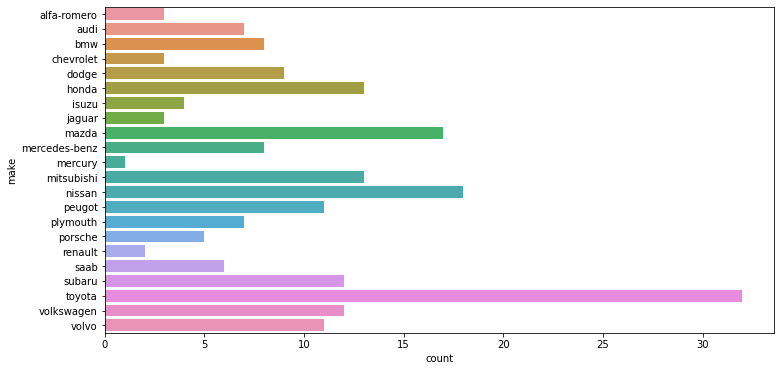

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(y='make', data=df)

It can be seen that majority of the automobiles in the dataset are manufactured by toyota.

### Plot a jointplot that shows the relationship between the 'horsepower' and 'price' of the car.

In [ ]:
corr

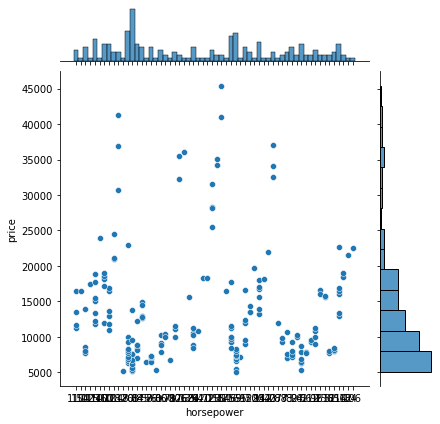

In [ ]:
sns.jointplot('horsepower', 'price', data=df)

There is a linear relationship between the horsepower and price. More the horsepower, higher is the price of the car.

### Plot the insurance risk ratings for all the automobiles

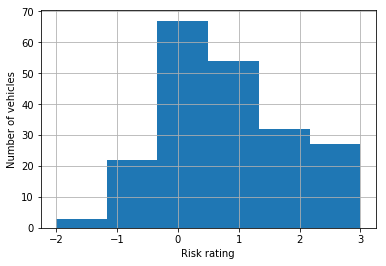

In [ ]:
df['symboling'].hist(bins=6)
plt.ylabel('Number of vehicles')
plt.xlabel('Risk rating');

It seems that majority of the automobiles have a risk rating of 0 and above. This indicates a good measure of safety.

### Plot a pie chart of the fuel-type of the automobiles

Text(0.5,1,'Fuel-Type diagram')

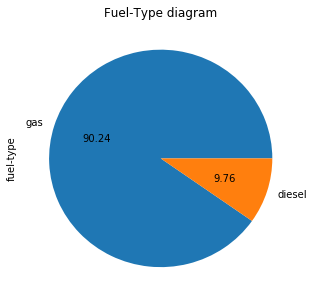

In [ ]:
df['fuel-type'].value_counts().plot.pie(figsize=(5,5),autopct='%.2f')
plt.title('Fuel-Type diagram')

- Looks like majority of the vehicles run on gas

### Plot the pearson correlation of all the features in a heatmap.

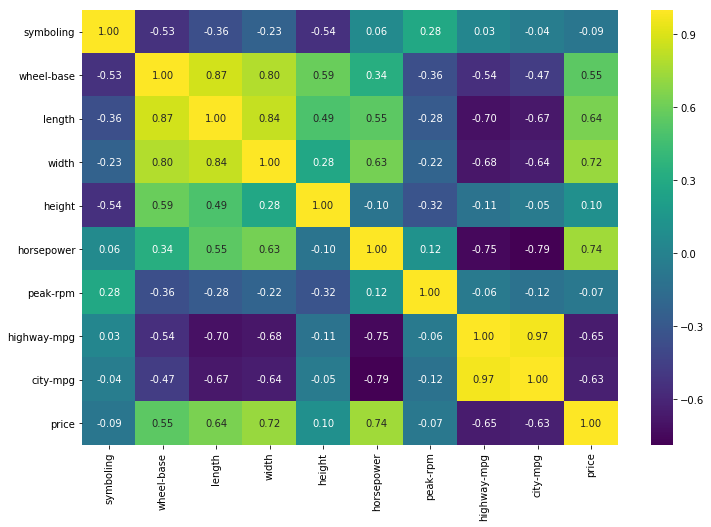

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='viridis',annot=True, fmt='.2f')

The pearson correlation coefficients calculated above are only for continuous features. The color table index next to the heatmap shows the varying levels of correlation.

A high negative correlation is denoted by darker shades and features having a high positive correlation are indicated by lighter shades

### Plot a boxplot that shows the variability of each 'body-style' with respect to the 'price'.

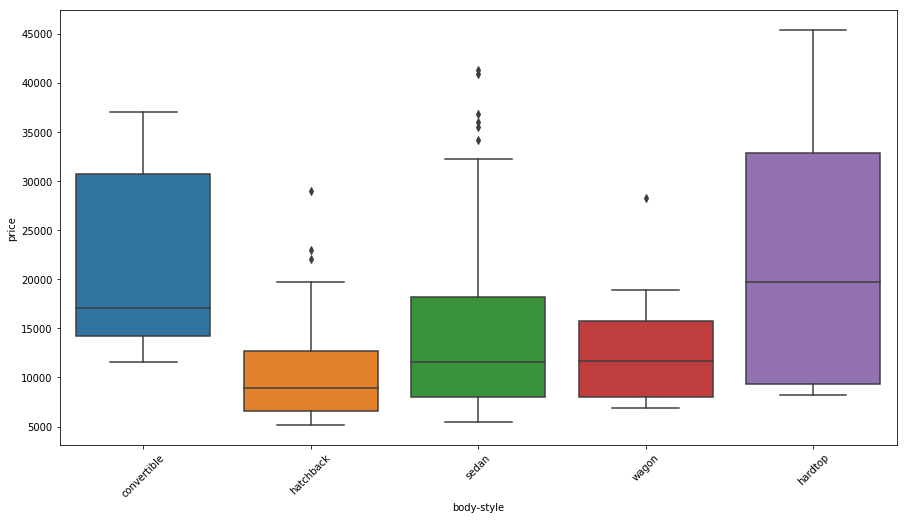

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 45)
sns.boxplot('body-style', 'price', data=df)

- The four boxes for every body type represent the interquartile ranges for each of them and the lines within every box represent the median.
- The dotted points for hatchback, sedan and wagon are outliers.

### Plot a boxplot showing the variablity in the 'price' for each 'make' of the car 

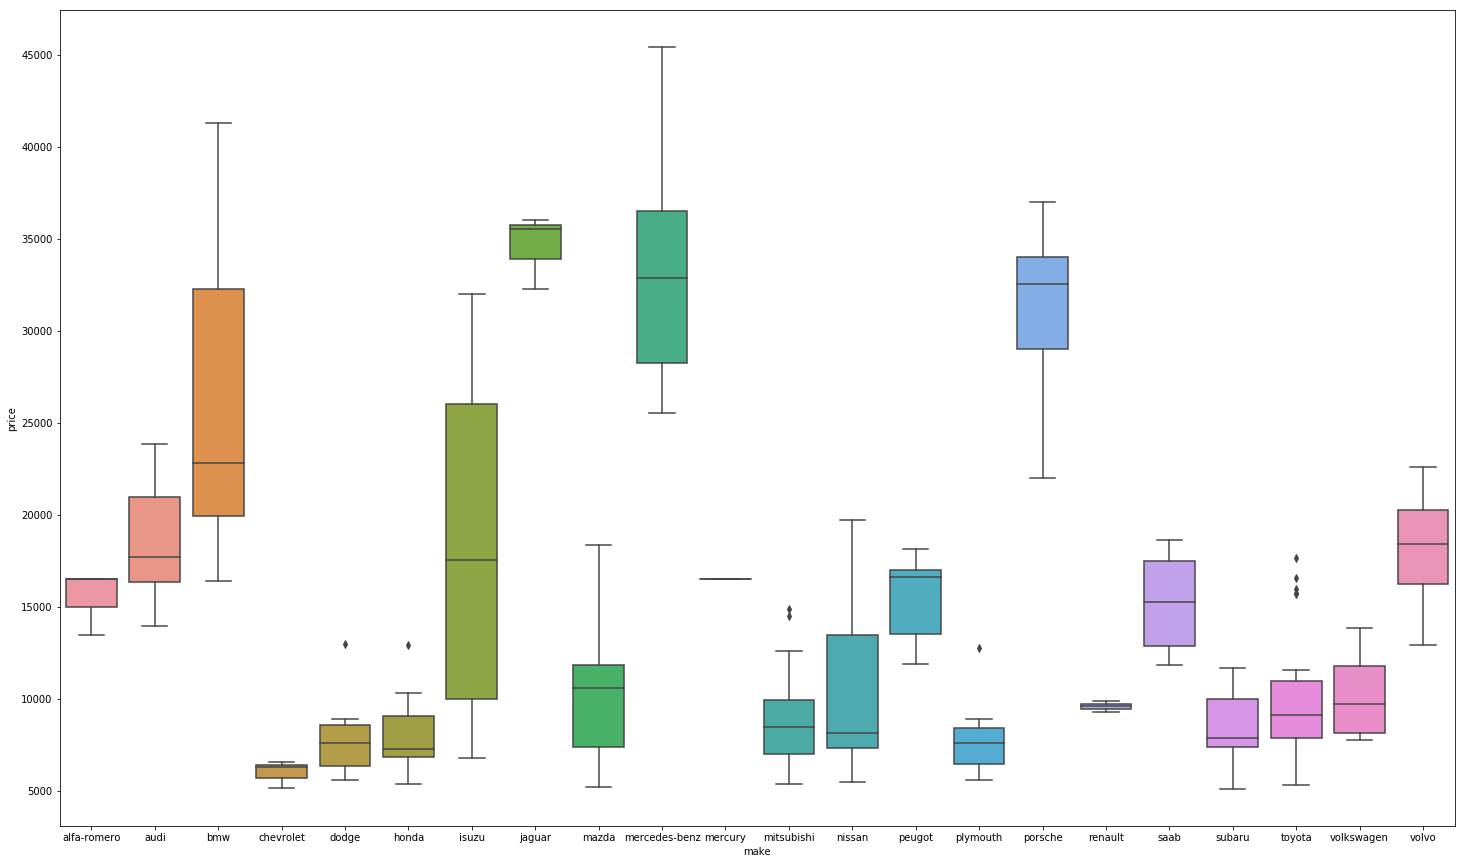

In [ ]:
plt.rcParams['figure.figsize']=(25,15)
sns.boxplot('make','price',data=df)

## Data Preprocessing

In [ ]:
df_1 = pd.read_csv('../data/Automobile_data.csv')
df_1.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


### Impute the missing values of the numerical data with mean of the particular column (Make sure you replace "?" by "NaN" before Imputing).

In [ ]:
#Replacing '?' by 'NaN' and then Imputing missing data in the columns 'normalized-losses','horsepower'
df_1 = df_1.replace("?","NaN")
numeric_imp = Imputer(missing_values="NaN",strategy='mean',axis=0)
df_1['normalized-losses'] = numeric_imp.fit_transform(df_1[['normalized-losses']])
df_1['horsepower'] = numeric_imp.fit_transform(df_1[['horsepower']])


### Check the skewness of the numeric features and apply square root transformation on features with skewness greater than 1.

In [ ]:
numeric_feature_auto = df_1._get_numeric_data().columns
for feature in numeric_feature_auto:
    if skew(df_1[feature])>1:
        df_1[feature] = np.sqrt(df_1[feature])


###  Label Encode the categorical features.


In [ ]:
def dummyEncode(df_1):
        columnsToEncode = list(df_1.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df_1[feature] = le.fit_transform(df_1[feature])
            except:
                print('Error encoding '+feature)
        return df_1
df_1 = dummyEncode(df_1)

### Combine the 'height' and 'width' to make a new feature 'area' of the frame of the car.

In [ ]:
df_1['area'] = df_1['height'] * df_1['width']